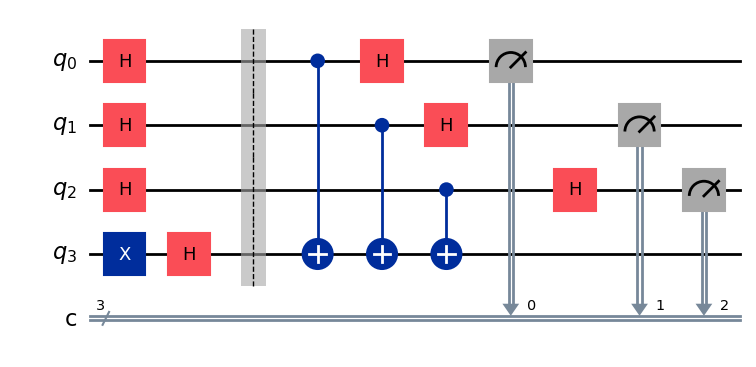

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram

################
#### はじめに
################
# ドイチェ-ジョザのアルゴリズムの目的は、オラクル関数（秘密のビット列 𝑠）が 「定数」か「バランス」かを判別すること
# 定数とは、全て1か全て0であること。
# バランスとは、1のビット数と0のビット数が同じであること。


# f(x) への入力変数xのbit長を設定
n = 3

################
#### オラクルの選択（求めたい関数がどちらなのかを、あらかじめ仕込む。）
################
# "b": バランス関数, "c":定数関数
oracle_type = "b"
# oracle_type = "c"

# 定数関数の場合: 測定結果は"000"となる。
# 　　　　　　　　再度アダマールゲートを適用（逆変換）した際、干渉が起こらないため、すべてのビットが |0⟩ に戻る。
# バランス関数の場合: 測定結果は"111"となる。
# 　　　　　　　　　　再度アダマールゲートを適用（逆変換）した際、干渉が起こり様々な重ね合わせバリエーションが出来る。それらを合計した結果、"111"に収束する為。


################
#### オラクル関数の適用
################
def apply_oracle(qc, oracle_type, n):
    if oracle_type == "c":  # 定数関数
        const_value = np.random.randint(2)  # 0 or 1 をランダムに選択
        # const_value = 1  # デバッグ用ここを固定値にして確認
        if const_value == 1:
            qc.x(n)  # 定数関数が1の場合、最下位量子ビットにXゲートを作用させる。
        else:
            qc.id(n) # 定数関数が0の場合は何も行わない（アダマール変換を2回適用してもとに戻る為、変化が無い。）
    else:  # バランス関数
        for ctr in range(n):
            qc.cx(ctr, n)
        # バランス関数のとき： 測定結果に多様性が生まれる（重ね合わせが反映される）。


################
#### ドイチェ-ジョザのアルゴリズム
################
# 量子回路の生成
qc = QuantumCircuit(n + 1, n)

qc.x(n)  # 最下位量子ビットを反転
qc.h(range(n + 1))  # すべての量子ビットにHゲート適用
qc.barrier()

# オラクルの適用
apply_oracle(qc, oracle_type, n)
# qc.barrier()

# 再度アダマールゲートを上位n量子ビットに適用
qc.h(range(n))


################
#### 測定
################
qc.measure(range(n), range(n))

################
#### 回路の描画
################
qc.draw(output='mpl')
# plt.show()

{'111': 1024}


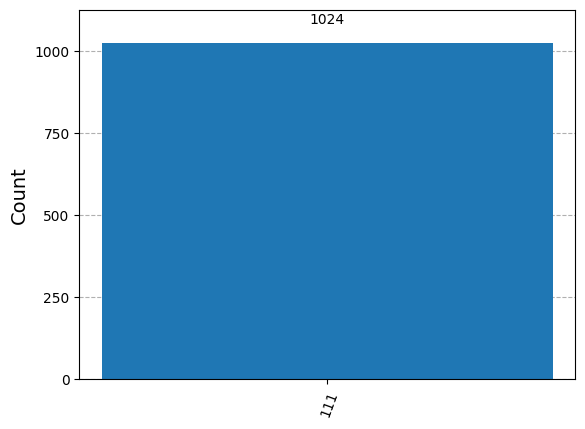

In [26]:
# シミュレーションの実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# 結果の取得と可視化
answer = result.get_counts()
print(answer)
plot_histogram(answer)
# plt.show()